<a href="https://colab.research.google.com/github/zzhining/financial_data_analysis/blob/main/pykrx_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
pip install pykrx

In [ ]:
df.head(3)

,시가,고가,저가,종가,거래량,등락률,UPDOWN,연도,월,연월,요일
날짜,,,,,,,,,,,
2023-01-02,5720,5840,5650,5720,44240,0.000000,DOWN,2023,1,2023-01,Monday
2023-01-03,5790,5830,5600,5790,96936,1.223776,DOWN,2023,1,2023-01,Tuesday
2023-01-04,5700,5800,5660,5760,131328,-0.518135,UP,2023,1,2023-01,Wednesday


종목을 입력하세요: 095570


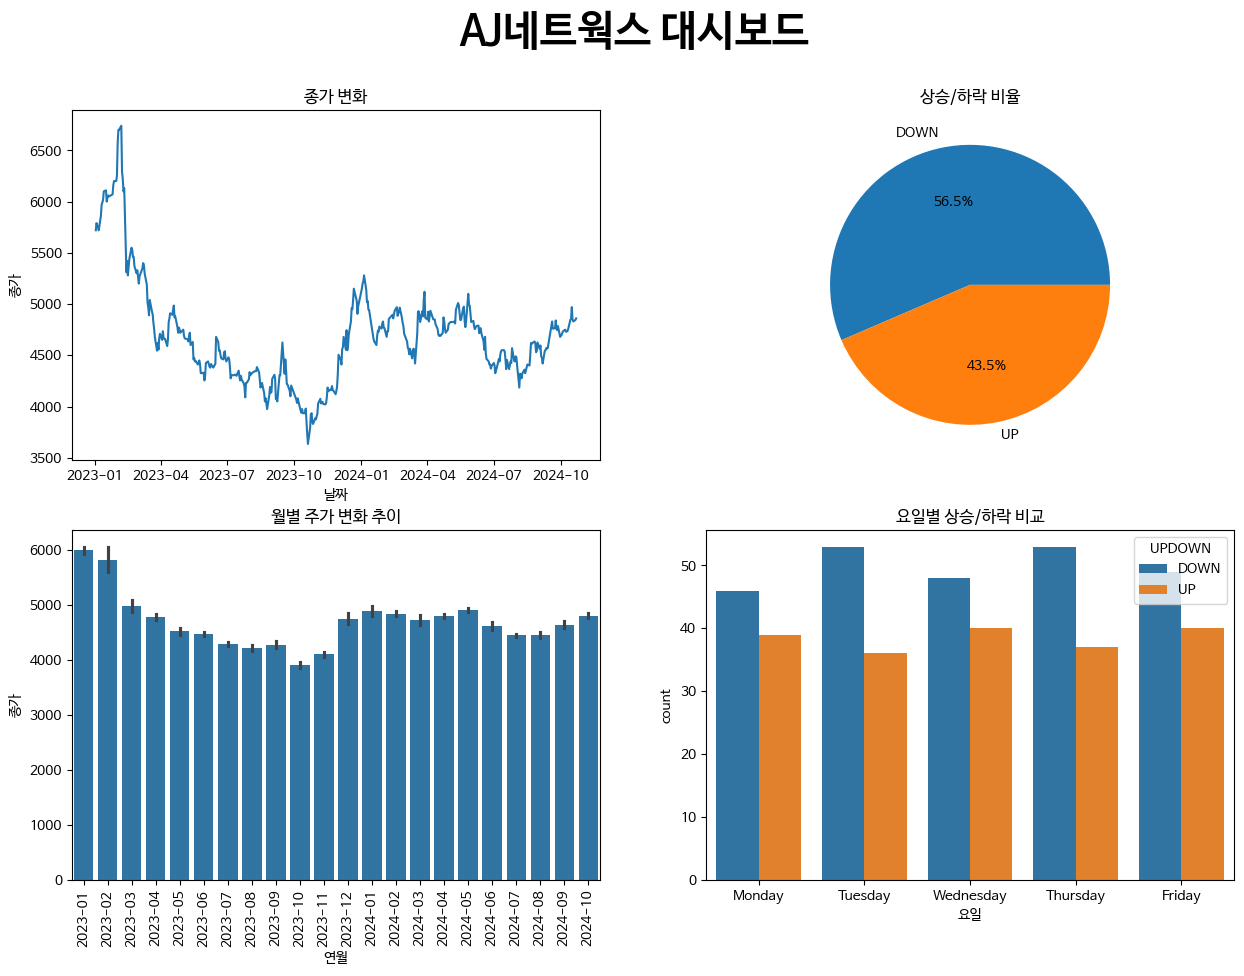

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pykrx import stock

# plt.rcParams["font.family"] = 'NanumGothic'

ticker = input('종목을 입력하세요: ') # 095570 AJ네트웍스
df = stock.get_market_ohlcv_by_date("20230101", "20241022", ticker)

df['UPDOWN'] = np.where(df['종가'] - df['시가'] > 0, 'UP', 'DOWN')
df.index = pd.to_datetime(df.index)
df['연도']= df.index.year
df['월'] = df.index.month
df['연월'] = df.index.to_period('M')
df['요일']= df.index.day_name()

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,10)

sns.lineplot(data = df, x = df.index, y = '종가', ax=ax[0][0])
sns.barplot(x="연월", y='종가', data=df, ax=ax[1][0])
ax[0][1].pie(df['UPDOWN'].value_counts(), labels = df['UPDOWN'].unique(), autopct = '%.1f%%')
sns.countplot(data = df, x = '요일', hue = 'UPDOWN', ax=ax[1][1])

name = stock.get_market_ticker_name(ticker)
plt.suptitle(name + " 대시보드", fontsize=30, fontweight='bold')
ax[0][0].set(title="종가 변화")
ax[1][0].set(title="월별 주가 변화 추이")
ax[1][1].set(title="요일별 상승/하락 비교")
ax[0][1].set(title="상승/하락 비율")

# 모든 서브플롯의 x축 레이블 회전 적용
for i, axis in enumerate(ax.flat):
    if i == 2:
      plt.sca(axis)
      plt.xticks(rotation=90)